## Treat training dataset

### import library and initial analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.impute import KNNImputer
%matplotlib inline

In [2]:
train_features = pd.read_csv('data/train_features.csv')
train_features.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [3]:
train_features.shape

(3817, 16)

In [4]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [5]:
train_labels.shape

(3817, 1)

In [6]:
train_features['jumlah_promosi'] = train_labels.copy()

In [7]:
train_features.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [8]:
train_features.shape

(3817, 17)

In [9]:
df = train_features.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [10]:
df.isna().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

### Data Preprocessing

#### Missing Values Exploration

In [11]:
df = df.drop(['tanggal_menjadi_anggota'], axis=1)
df.isna().sum()

tahun_kelahiran         0
pendidikan            189
status_pernikahan     212
pendapatan            190
jumlah_anak_balita    190
jumlah_anak_remaja    204
terakhir_belanja      172
belanja_buah          181
belanja_daging        178
belanja_ikan          193
belanja_kue           214
pembelian_diskon      178
pembelian_web         165
pembelian_toko        169
keluhan               196
jumlah_promosi          0
dtype: int64

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64




In [13]:
df['pendidikan'] = df['pendidikan'].replace('5', np.nan)
df['status_pernikahan'] = df['status_pernikahan'].replace('5', np.nan)

for i in cat_cols:
    print(f'{df[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
Name: status_pernikahan, dtype: int64




In [14]:
def null_statistics(df):
    
    # Create a DataFrame to show column information

    null_info = pd.DataFrame({
        'Column Name': df.columns,
        'Column Data Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        'Null Percentage': df.isnull().mean() * 100
    })

    null_info.reset_index(drop=True, inplace=True)  # Reset the index

    # Display the DataFrame
    
    null_info = null_info[null_info["Null Values"] > 0]
    null_info = null_info.sort_values(by = 'Null Values', ascending = False).reset_index(drop=True)
    
    print("")
    print(f"There are {null_info.shape[0]} columns ({null_info.shape[0] / len(df.columns) * 100:,.2f} %) with Null values out of {len(df.columns)} columns in Dataframe.")
    print("")
    
    return null_info

train_null_data = null_statistics(df)

train_null_data


There are 14 columns (87.50 %) with Null values out of 16 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,belanja_kue,float64,214,5.606497
1,status_pernikahan,object,213,5.580299
2,jumlah_anak_remaja,float64,204,5.344511
3,keluhan,float64,196,5.134923
4,belanja_ikan,float64,193,5.056327
5,pendidikan,object,191,5.003930
6,pendapatan,float64,190,4.977731
7,jumlah_anak_balita,float64,190,4.977731
8,belanja_buah,float64,181,4.741944
9,belanja_daging,float64,178,4.663348


In [15]:
df_null_handled = df.copy()

In [16]:
def impute_with_knn(data):
    num_columns = data.select_dtypes(['int64', 'float64']).columns

    num_imputer = KNNImputer(n_neighbors=5, weights='distance')
    num_imputed_data = num_imputer.fit_transform(data[num_columns])
    num_imputed_byKNN_df = pd.DataFrame(num_imputed_data, columns=num_columns)
    return num_imputed_byKNN_df

num_imputed_byKNN_df = impute_with_knn(df_null_handled)

num_imputed_byKNN_df.isna().sum()

tahun_kelahiran       0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

In [18]:
def impute_cat_with_mode(data):
    cat_columns = data.select_dtypes(['object']).columns

    for col in cat_columns:
        data[col].fillna(df[col].mode()[0], inplace=True)
    
    return data[cat_columns]

df_null_handled[['pendidikan', 'status_pernikahan']] = impute_cat_with_mode(df_null_handled)

In [19]:
# df null handled by mode and knn = df_mk
num_columns = df_null_handled.select_dtypes(['int64', 'float64']).columns

df_null_handled[num_columns] = num_imputed_byKNN_df
df_mk = df_null_handled.copy()

df_mk.isna().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

#### Duplicate Values Exploration

In [20]:
df_mk.shape

(3817, 16)

In [21]:
df_mk.duplicated().sum()

0

#### Outliers Exploration

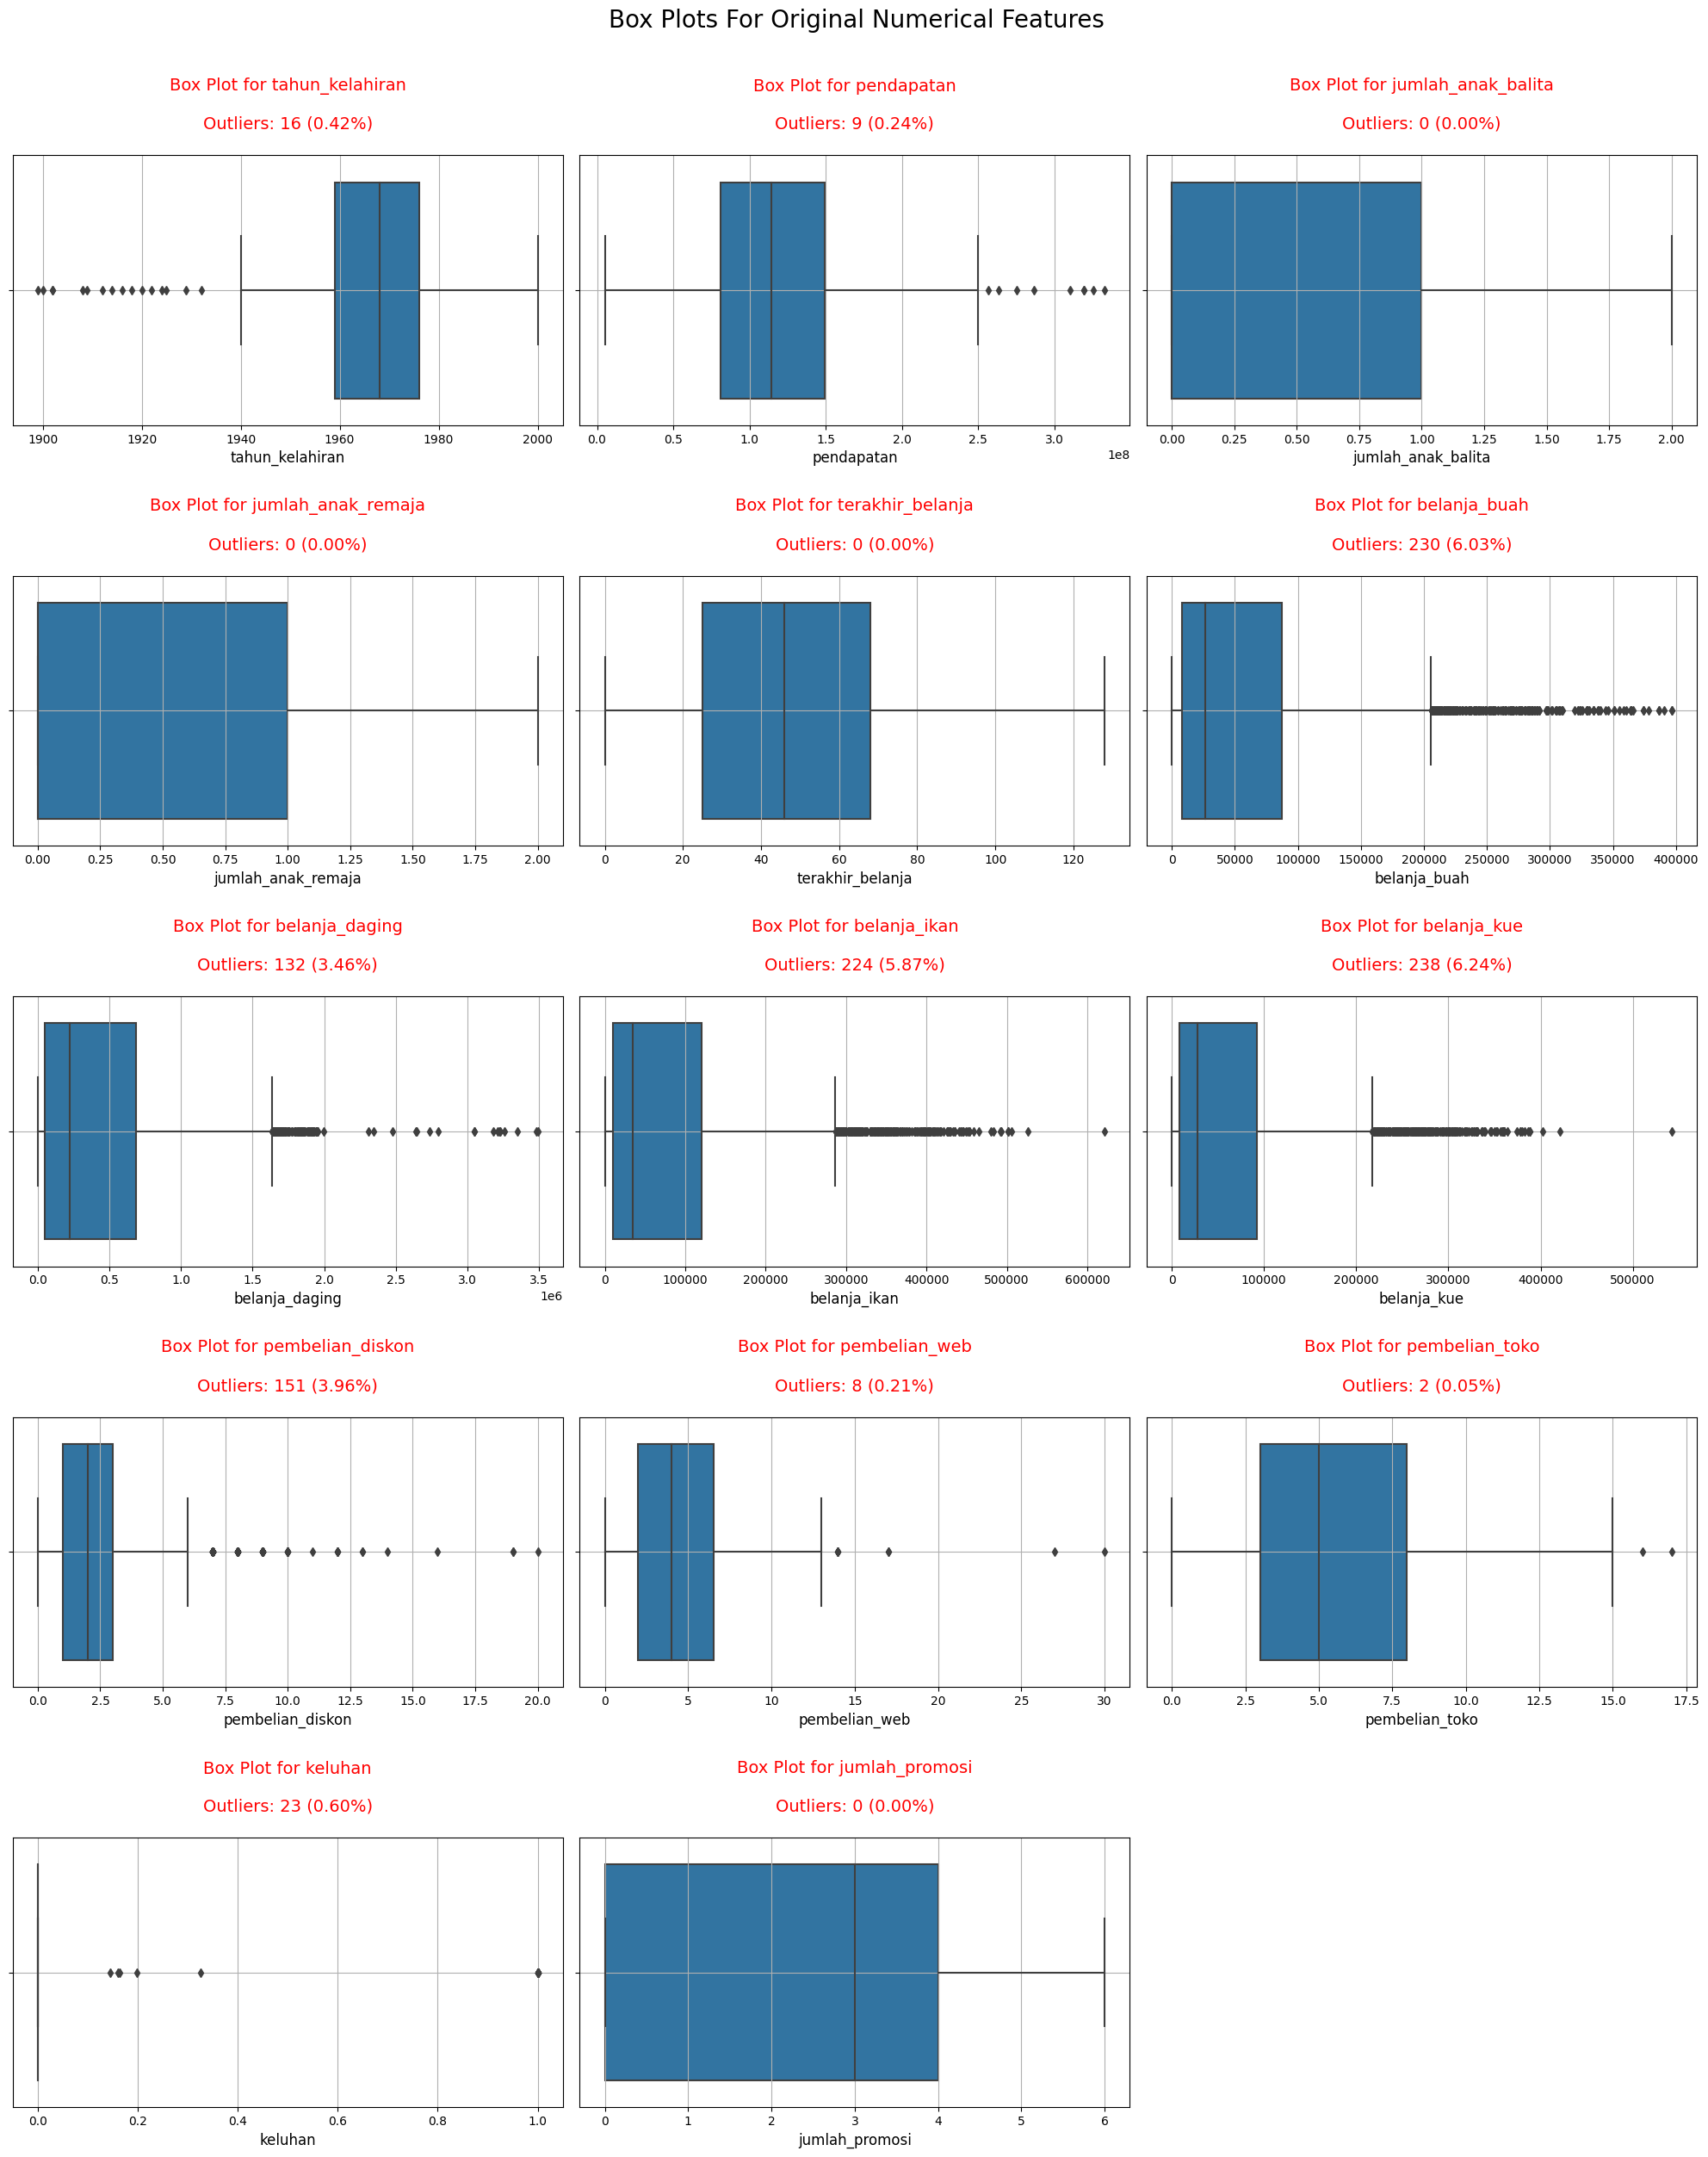

In [22]:
# Select numerical columns from df_mk

numerical_columns = df_mk.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Original Numerical Features", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_mk[col].quantile(0.25)
    Q3 = df_mk[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_mk[col] < Q1 - 1.5 * IQR) | (df_mk[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_mk)) * 100
    
    sns.boxplot(x=df_mk[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

In [23]:
# pada kolom tahun_kelahiran, hapus outlier karena agaknya aneh jika terdapat orang di data tersebut yang lahir pada 100 tahun yang lalu

Q1 = df_mk['tahun_kelahiran'].quantile(0.25)
Q3 = df_mk['tahun_kelahiran'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan nilai tahun_kelahiran di luar batas bawah dan batas atas
df_mk_filtered = df_mk[(df_mk['tahun_kelahiran'] >= lower_bound) & (df_mk['tahun_kelahiran'] <= upper_bound)]

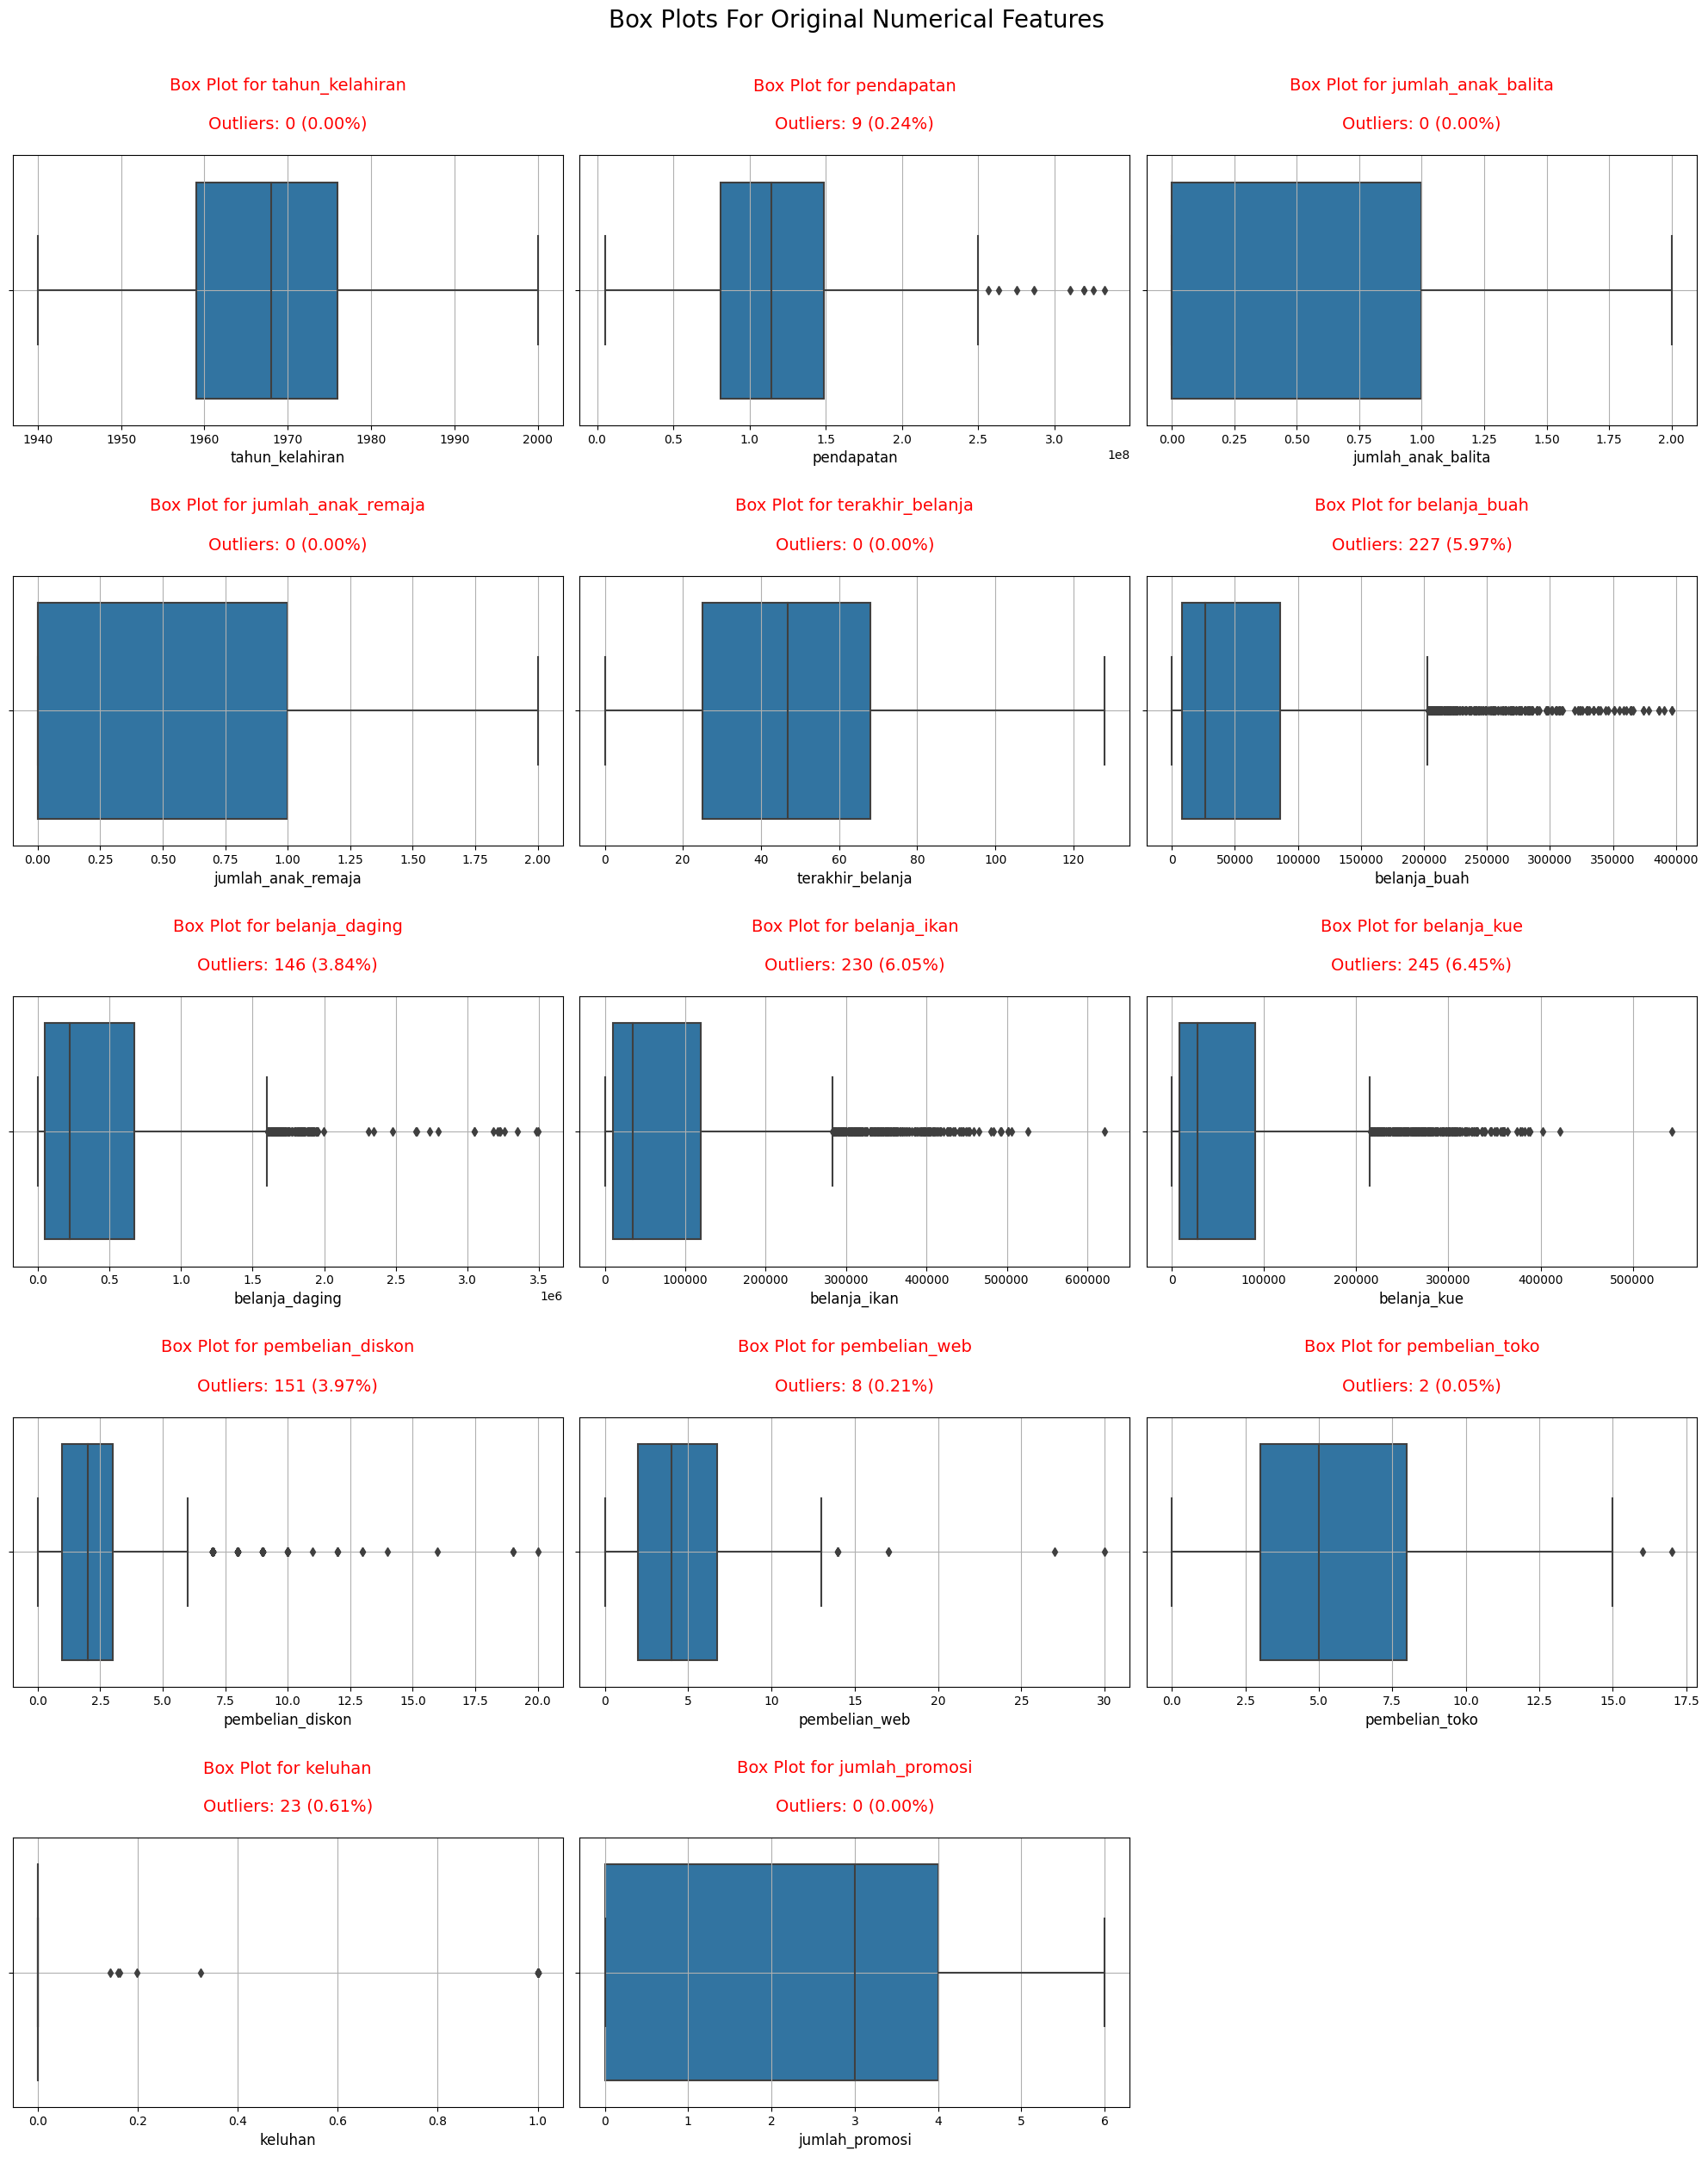

In [24]:
# Select numerical columns from df_mk_filtered

numerical_columns = df_mk_filtered.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Original Numerical Features", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_mk_filtered[col].quantile(0.25)
    Q3 = df_mk_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_mk_filtered[col] < Q1 - 1.5 * IQR) | (df_mk_filtered[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_mk_filtered)) * 100
    
    sns.boxplot(x=df_mk_filtered[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

#### Fix Possible Wrong Inputation

In [25]:
df_mk_filtered['jumlah_anak_balita'].value_counts()

0.000000    2643
1.000000    1008
2.000000      30
0.532691       1
0.147981       1
            ... 
0.748431       1
0.407837       1
0.170675       1
0.765094       1
0.109290       1
Name: jumlah_anak_balita, Length: 123, dtype: int64

terdapat jumlah anak yang continuous

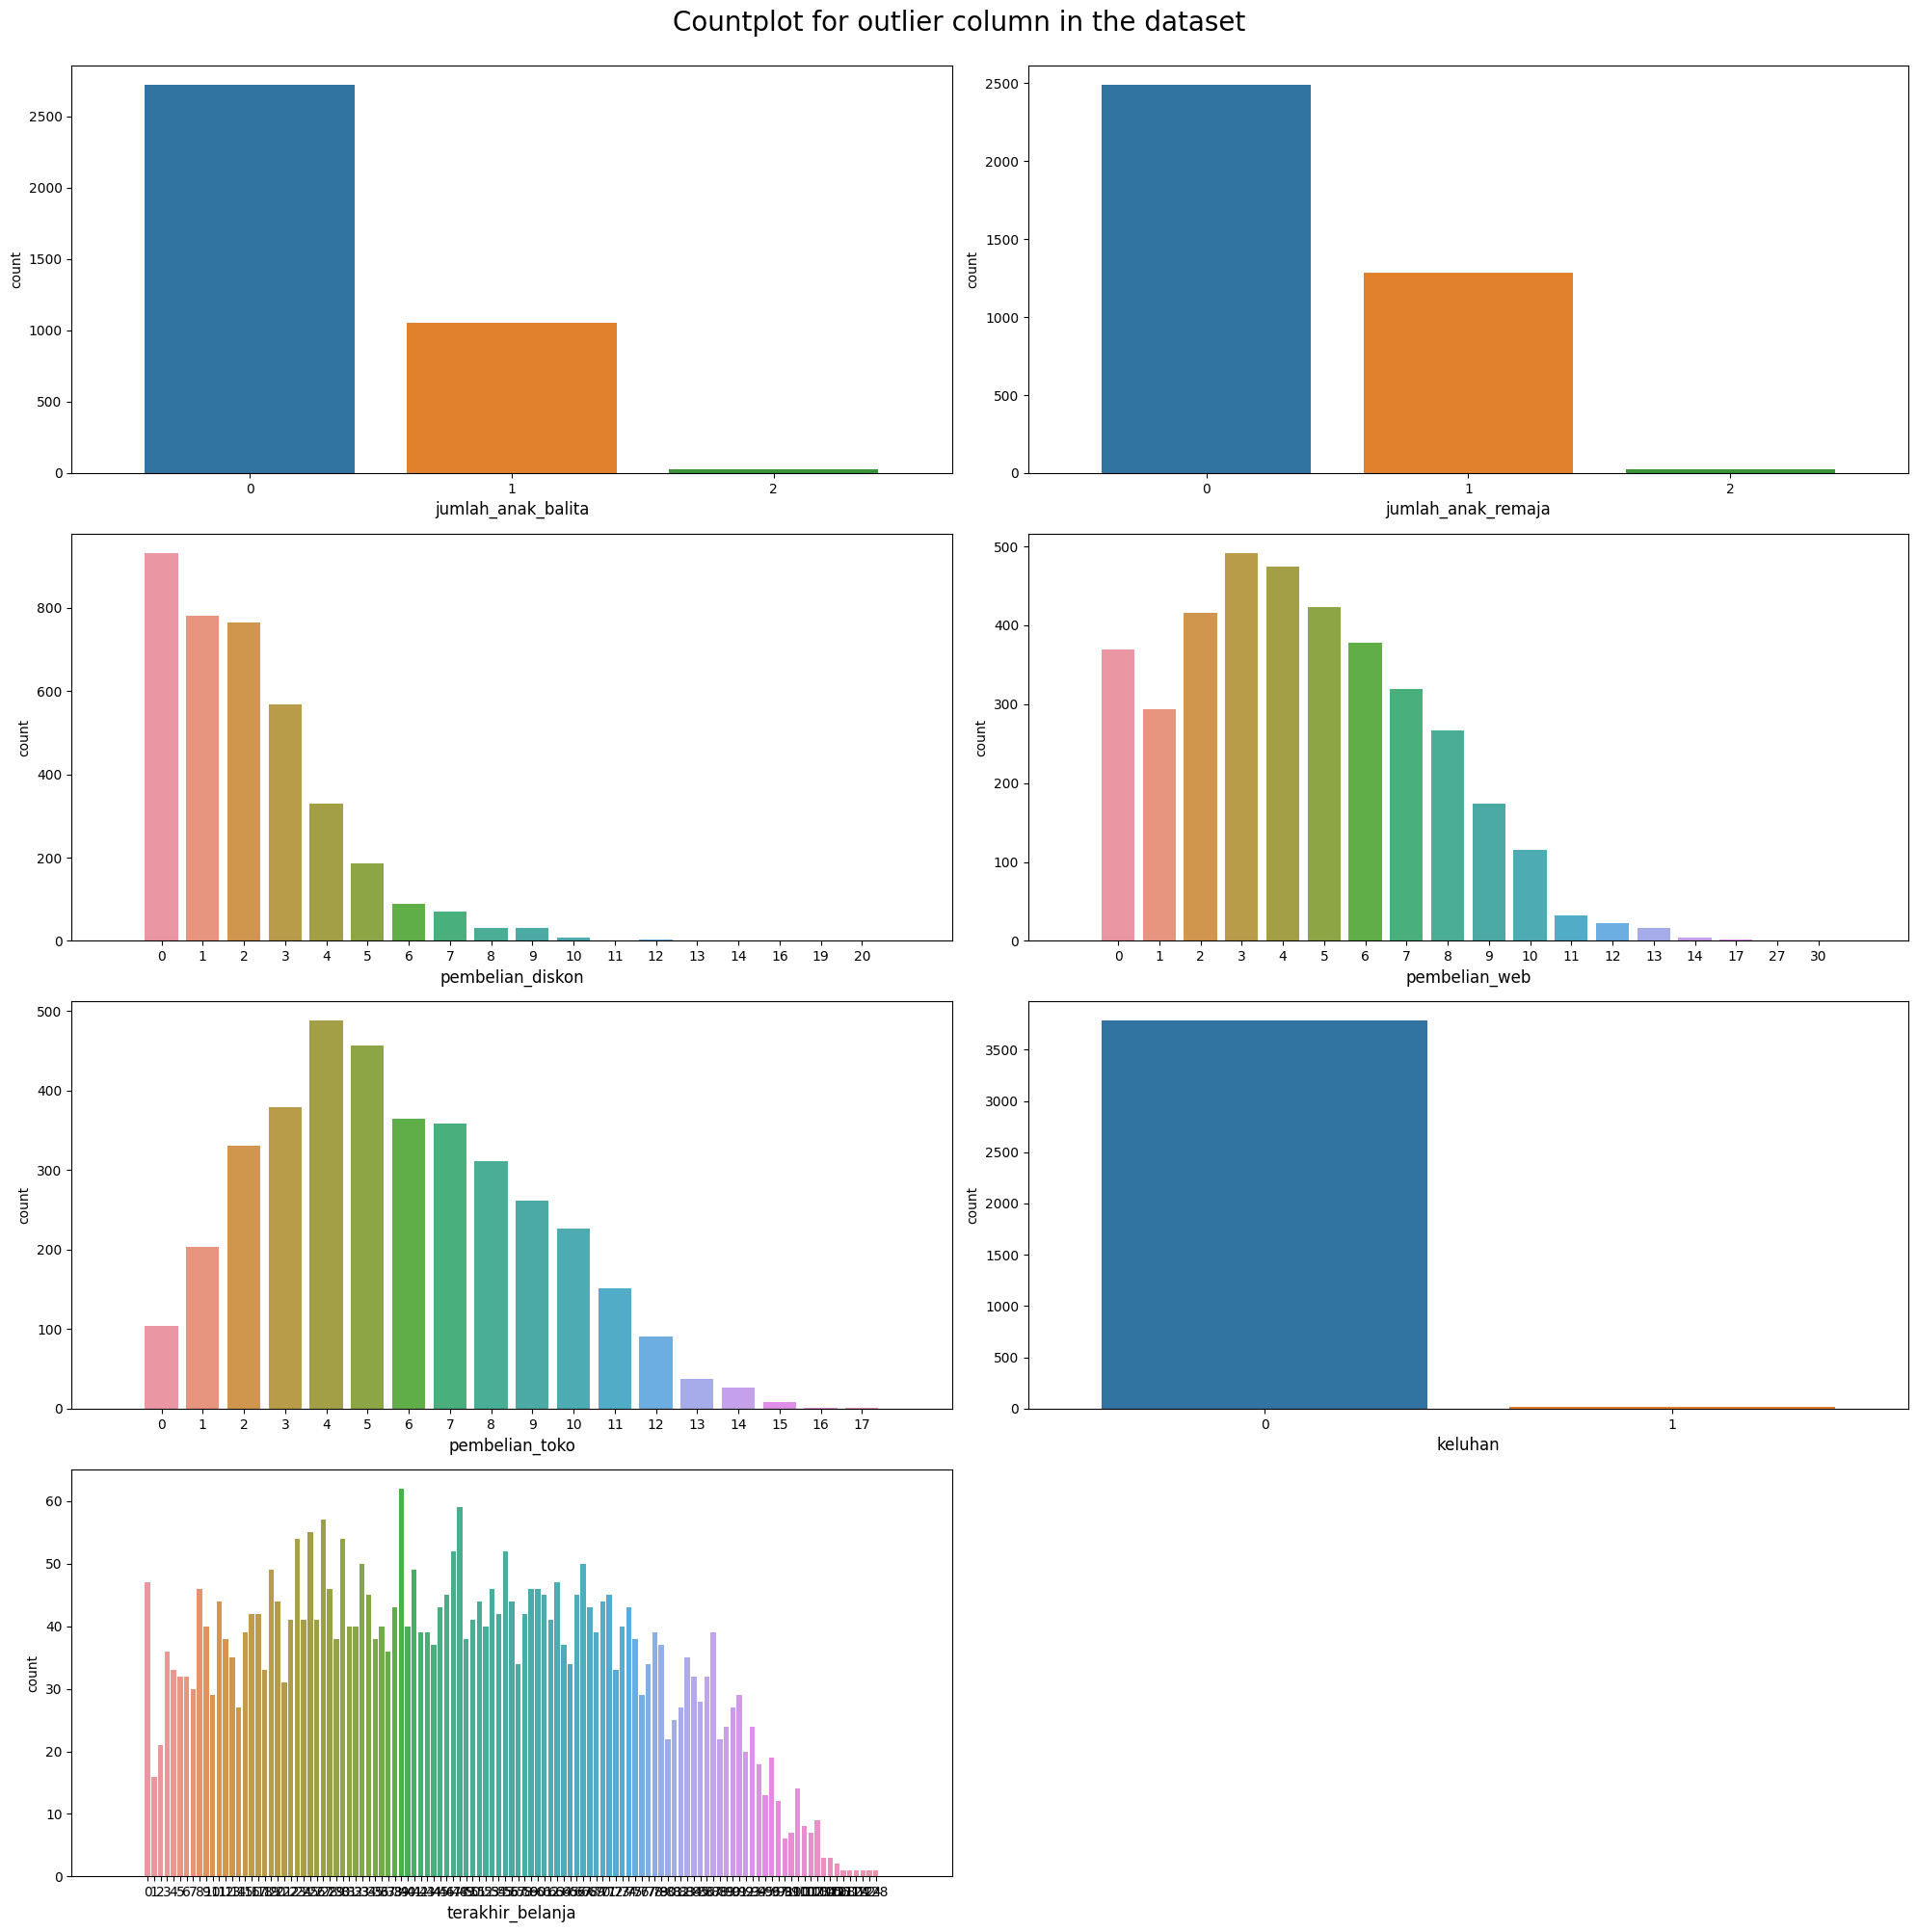

In [26]:
# pembulatan input yang salah
def round_value(value):
    if value % 1 < 0.5:
        return int(np.floor(value))
    else:
        return int(np.ceil(value))
    

# visualize updated data
def show_countplot(data):
  possible_wrong_input_cols = data[['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']]
  num_cols = 2
  num_rows = (possible_wrong_input_cols.shape[1] + num_cols -1 ) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

  # Add a main title to the entire set of subplots
  fig.suptitle("Countplot for outlier column in the dataset", y=1, fontsize=20)


  for i, col in enumerate(possible_wrong_input_cols):

      # Calculate current row and column for the subplot
      row_idx = i // num_cols
      col_idx = i % num_cols

      pic = sns.countplot(possible_wrong_input_cols, x=col, ax=axes[row_idx, col_idx])
      axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
      pic.margins(x=0.1)

  # Remove any empty subplots
  for i in range(len(possible_wrong_input_cols.columns), num_rows * num_cols):
      fig.delaxes(axes.flatten()[i])

  # Adjust layout
  plt.tight_layout()
  plt.show()


possible_wrong_input_cols = ['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']

for col in possible_wrong_input_cols:
    df_mk_filtered[col] = df_mk_filtered[col].apply(lambda x: round_value(x))
    
show_countplot(df_mk_filtered)

#### Encode Categorical Data

In [27]:
cat_cols = df_mk_filtered.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df_mk_filtered[i].value_counts()}')
    print('\n')

Sarjana     2032
Magister     852
SMA          435
Doktor       391
SMP           91
Name: pendidikan, dtype: int64


Rencana Menikah    1473
Menikah            1112
Sendiri             962
Cerai               214
Cerai Mati           40
Name: status_pernikahan, dtype: int64




In [28]:
def apply_custom_ordinal_encoding_mappings(df, default_value = 0):
    
    ordinal_encoding_columns_mappings = {
    
        'pendidikan': {'SMP': 1, 'SMA': 2, 'Sarjana': 3, 'Magister': 4, 'Doktor': 5},
        'status_pernikahan': {'Sendiri': 1, 'Rencana Menikah': 2, 'Menikah': 3, 'Cerai': 4, 'Cerai Mati': 5}
    }
    
    for col, mapping in ordinal_encoding_columns_mappings.items():
        
        if col in df.columns:
            
            df[col] = df[col].map(mapping).fillna(default_value)
        
    return df

In [29]:
df_mk_filtered[cat_cols] = apply_custom_ordinal_encoding_mappings(df_mk_filtered[cat_cols])
for i in cat_cols:
    print(f'{df_mk_filtered[i].value_counts()}')
    print('\n')

3    2032
4     852
2     435
5     391
1      91
Name: pendidikan, dtype: int64


2    1473
3    1112
1     962
4     214
5      40
Name: status_pernikahan, dtype: int64




In [30]:
df_mk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3801 non-null   float64
 1   pendidikan          3801 non-null   int64  
 2   status_pernikahan   3801 non-null   int64  
 3   pendapatan          3801 non-null   float64
 4   jumlah_anak_balita  3801 non-null   int64  
 5   jumlah_anak_remaja  3801 non-null   int64  
 6   terakhir_belanja    3801 non-null   int64  
 7   belanja_buah        3801 non-null   float64
 8   belanja_daging      3801 non-null   float64
 9   belanja_ikan        3801 non-null   float64
 10  belanja_kue         3801 non-null   float64
 11  pembelian_diskon    3801 non-null   int64  
 12  pembelian_web       3801 non-null   int64  
 13  pembelian_toko      3801 non-null   int64  
 14  keluhan             3801 non-null   int64  
 15  jumlah_promosi      3801 non-null   float64
dtypes: flo

### EDA

#### Statistics Summary

In [31]:
df_mk_filtered_desc = df_mk_filtered.describe().T
df_mk_filtered_desc['skewness'] = df_mk_filtered.select_dtypes(include=[np.number]).skew()
df_mk_filtered_desc['range'] = np.ptp(df_mk_filtered.select_dtypes(include=[np.number]), axis=0)
df_mk_filtered_desc

,count,mean,std,min,25%,50%,75%,max,skewness,range
tahun_kelahiran,3801.0,1.968048e+03,1.125222e+01,1940.0,1959.0,1968.0,1976.0,2000.0,0.049103,60.0
pendidikan,3801.0,3.267561e+00,8.800255e-01,1.0,3.0,3.0,4.0,5.0,0.147572,4.0
status_pernikahan,3801.0,2.183636e+00,9.121724e-01,1.0,1.0,2.0,3.0,5.0,0.408168,4.0
pendapatan,3801.0,1.137968e+08,4.305365e+07,5073000.0,80732848.0,114221000.0,148952989.0,332884000.0,0.023147,327811000.0
jumlah_anak_balita,3801.0,2.925546e-01,4.720279e-01,0.0,0.0,0.0,1.0,2.0,1.135889,2.0
jumlah_anak_remaja,3801.0,3.520126e-01,4.917763e-01,0.0,0.0,0.0,1.0,2.0,0.791879,2.0
terakhir_belanja,3801.0,4.700605e+01,2.667635e+01,0.0,25.0,47.0,68.0,128.0,0.121757,128.0
belanja_buah,3801.0,5.903159e+04,7.266166e+04,0.0,8092.0,26299.0,86201.0,396508.0,1.705073,396508.0
belanja_daging,3801.0,4.362310e+05,5.053819e+05,0.0,50759.0,223853.0,671964.0,3489675.0,1.628290,3489675.0
belanja_ikan,3801.0,8.007169e+04,9.852014e+04,0.0,10115.0,34391.0,119357.0,621600.0,1.672601,621600.0


#### Correlation Exploration

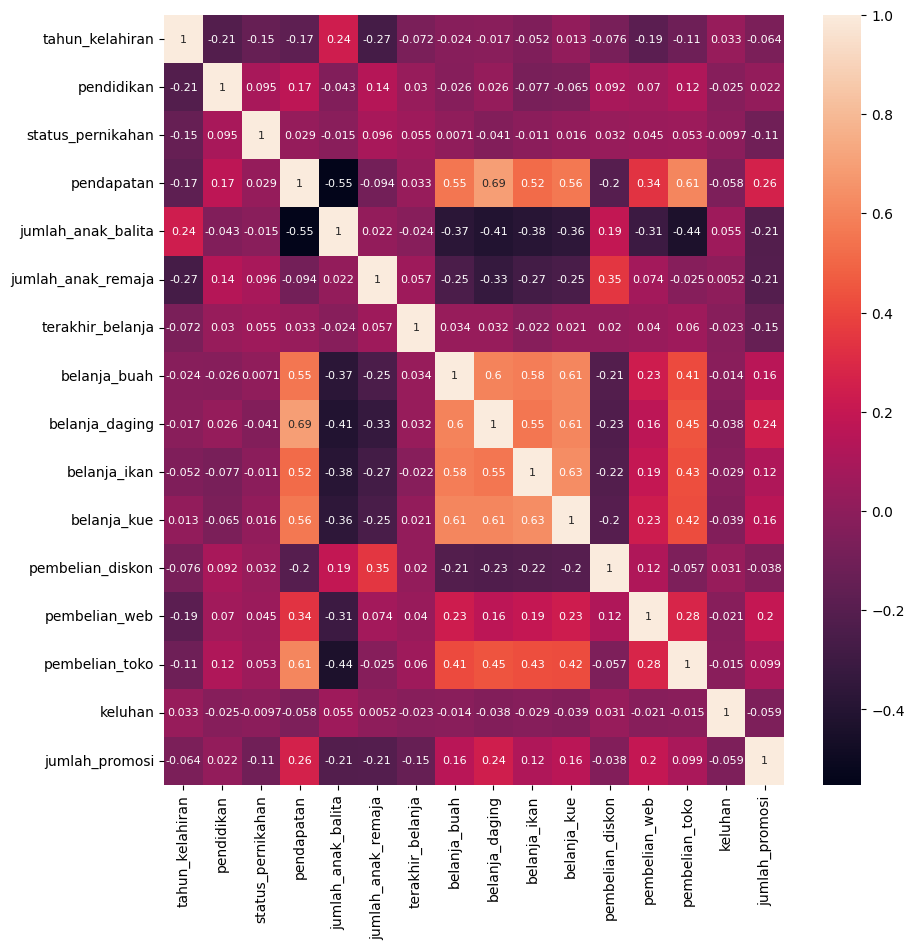

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mk_filtered.corr(),annot=True, annot_kws={"fontsize": 8})
plt.show()

#### Feature Scalling

In [33]:
from sklearn.preprocessing import RobustScaler

feature_selected = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan','pembelian_diskon', 'belanja_kue', 'pembelian_web', 'pembelian_toko']
feature_df = df_mk_filtered[feature_selected].copy()
target_df = df_mk_filtered['jumlah_promosi'].copy()

# Fit and transform features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(feature_df)

# Convert scaled features array to DataFrame
scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_selected)

# Fit and transform target
target_scaler = RobustScaler()
scaled_target = target_scaler.fit_transform(target_df.values.reshape(-1, 1))

# Convert scaled target array to DataFrame
scaled_target_df = pd.DataFrame(scaled_target, columns=['jumlah_promosi'])

scaled_feature_df


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,pembelian_diskon,belanja_kue,pembelian_web,pembelian_toko
0,0.647059,0.0,0.0,-0.106715,0.0,1.0,-0.511628,0.310796,0.059745,0.148148,0.0,-0.089920,-0.4,0.0
1,-1.058824,0.0,0.0,-0.442069,0.0,0.0,0.534884,-0.258997,-0.288708,0.425926,3.5,-0.089920,0.4,-0.2
2,-0.117647,0.0,0.5,0.195127,0.0,0.0,-0.046512,1.169033,0.066978,0.567090,-0.5,1.423153,-0.6,0.4
3,-0.411765,1.0,0.0,0.752837,0.0,0.0,1.000000,2.305074,2.237664,-0.061020,-1.0,1.185285,0.6,0.6
4,0.117647,0.0,0.0,0.051043,1.0,1.0,0.720930,0.822748,0.141506,0.054622,2.5,0.074795,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,-0.764706,1.0,0.5,-0.528019,0.0,0.0,-0.325581,-0.258997,-0.318536,-0.279517,1.5,-0.264305,-0.6,-1.0
3797,-1.235294,2.0,0.0,-0.072046,0.0,1.0,-0.069767,-0.336696,-0.278939,-0.231193,0.5,-0.334126,0.4,-0.4
3798,0.352941,1.0,0.5,-0.140721,0.0,2.0,0.488372,-0.310796,-0.259399,-0.240741,2.5,-0.334126,0.2,0.4
3799,-0.647059,-1.0,0.0,-0.049414,1.0,1.0,0.465116,-0.103599,-0.246373,-0.092593,1.0,-0.137443,0.2,-0.2


### Modelling

#### Model and Evaluation

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [35]:
X = scaled_feature_df.copy()
y = target_df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression = LogisticRegression()
RidgeClassifier = RidgeClassifier()
SGDClassifier = SGDClassifier(loss='log')  
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
BaggingClassifier = BaggingClassifier()
ExtraTreesClassifier = ExtraTreesClassifier()
AdaBoostClassifier = AdaBoostClassifier()
GradientBoostingClassifier = GradientBoostingClassifier()
KNeighborsClassifier = KNeighborsClassifier()
svc = SVC(probability=True) 
XGBClassifier = XGBClassifier()
LGBMClassifier = LGBMClassifier()
CatBoostClassifier = CatBoostClassifier(verbose=0)


LogisticRegression = LogisticRegression.fit(X_train, y_train)
RidgeClassifier = RidgeClassifier.fit(X_train, y_train)
SGDClassifier = SGDClassifier.fit(X_train, y_train)
DecisionTreeClassifier = DecisionTreeClassifier.fit(X_train, y_train)
RandomForestClassifier = RandomForestClassifier.fit(X_train, y_train)
BaggingClassifier = BaggingClassifier.fit(X_train, y_train)
ExtraTreesClassifier = ExtraTreesClassifier.fit(X_train, y_train)
AdaBoostClassifier = AdaBoostClassifier.fit(X_train, y_train)
GradientBoostingClassifier = GradientBoostingClassifier.fit(X_train, y_train)
KNeighborsClassifier = KNeighborsClassifier.fit(X_train, y_train)
svc = svc.fit(X_train, y_train)
XGBClassifier = XGBClassifier.fit(X_train, y_train)
LGBMClassifier = LGBMClassifier.fit(X_train, y_train)
CatBoostClassifier = CatBoostClassifier.fit(X_train, y_train)


y_pred_logisticRegression = LogisticRegression.predict(X_test)
y_pred_RidgeClassifier = RidgeClassifier.predict(X_test)
y_pred_SGDClassifier = SGDClassifier.predict(X_test)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)
y_pred_GradientBoostingClassifier = GradientBoostingClassifier.predict(X_test)
y_pred_KNeighborsClassifier = KNeighborsClassifier.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
y_pred_LGBMClassifier = LGBMClassifier.predict(X_test)
y_pred_CatBoostClassifier = CatBoostClassifier.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1506
[LightGBM] [Info] Number of data points in the train set: 3040, number of used features: 14
[LightGBM] [Info] Start training from score -1.357758
[LightGBM] [Info] Start training from score -2.005898
[LightGBM] [Info] Start training from score -2.263871
[LightGBM] [Info] Start training from score -2.119715
[LightGBM] [Info] Start training from score -1.991334
[LightGBM] [Info] Start training from score -1.926043
[LightGBM] [Info] Start training from score -2.283040


In [36]:
predictions = [y_pred_SGDClassifier, y_pred_DecisionTreeClassifier, y_pred_RandomForestClassifier, y_pred_BaggingClassifier, y_pred_ExtraTreesClassifier, y_pred_AdaBoostClassifier, y_pred_GradientBoostingClassifier, y_pred_KNeighborsClassifier, y_pred_svc, y_pred_XGBClassifier, y_pred_LGBMClassifier, y_pred_CatBoostClassifier]
model_names = ['SGDClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'svc', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

# Metrik evaluasi yang akan digunakan
metrics = {
    'Model Name' : [],
    'F1 Score': []
}

# Looping untuk mengevaluasi setiap model
for i in range(len(model_names)):
    
    metrics['Model Name'].append(model_names[i])
    metrics['F1 Score'].append(f1_score(y_test, predictions[i], average='macro'))

metrics = pd.DataFrame(metrics)
metrics

,Model Name,F1 Score
0,SGDClassifier,0.241825
1,DecisionTreeClassifier,0.566656
2,RandomForestClassifier,0.719132
3,BaggingClassifier,0.659945
4,ExtraTreesClassifier,0.737093
5,AdaBoostClassifier,0.317940
6,GradientBoostingClassifier,0.569165
7,KNeighborsClassifier,0.561804
8,svc,0.421118
9,XGBClassifier,0.694646


## Treat Testing Dataset

In [37]:
df_test = pd.read_csv('data/test_features.csv')
df_test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [39]:
df_test.isna().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64

In [40]:
df_test = df_test.drop(['tanggal_menjadi_anggota'], axis=1)
df_test.isna().sum()

ID                      0
tahun_kelahiran         0
pendidikan            204
status_pernikahan     182
pendapatan            203
jumlah_anak_balita    209
jumlah_anak_remaja    210
terakhir_belanja      201
belanja_buah          186
belanja_daging        195
belanja_ikan          196
belanja_kue           187
pembelian_diskon      179
pembelian_web         180
pembelian_toko        186
keluhan               193
dtype: int64

In [42]:
cat_cols = df_test.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df_test[i].value_counts()}')
    print('\n')

Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: pendidikan, dtype: int64


Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: status_pernikahan, dtype: int64




In [43]:
df_test['pendidikan'] = df_test['pendidikan'].replace('5', np.nan)
df_test['status_pernikahan'] = df_test['status_pernikahan'].replace('5', np.nan)

for i in cat_cols:
    print(f'{df_test[i].value_counts()}')
    print('\n')

Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
Name: pendidikan, dtype: int64


Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
Name: status_pernikahan, dtype: int64




In [44]:
test_null_data = null_statistics(df_test)
test_null_data


There are 14 columns (87.50 %) with Null values out of 16 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,jumlah_anak_remaja,float64,210,5.500262
1,jumlah_anak_balita,float64,209,5.474070
2,pendidikan,object,206,5.395495
3,pendapatan,float64,203,5.316920
4,terakhir_belanja,float64,201,5.264536
5,belanja_ikan,float64,196,5.133578
6,belanja_daging,float64,195,5.107386
7,keluhan,float64,193,5.055003
8,belanja_kue,float64,187,4.897852
9,belanja_buah,float64,186,4.871661


In [45]:
df_test_null_handled = df_test.copy()

num_test_imputed_byKNN_df = impute_with_knn(df_test_null_handled)

num_test_imputed_byKNN_df.isna().sum()

ID                    0
tahun_kelahiran       0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
dtype: int64

In [46]:
df_test_null_handled[['pendidikan', 'status_pernikahan']] = impute_cat_with_mode(df_test_null_handled)

# df null handled by mode and knn = df_mk
num_columns = df_test_null_handled.select_dtypes(['int64', 'float64']).columns

df_test_null_handled[num_columns] = num_test_imputed_byKNN_df
df_test_mk = df_test_null_handled.copy()

df_test_mk.isna().sum()

ID                    0
tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
dtype: int64

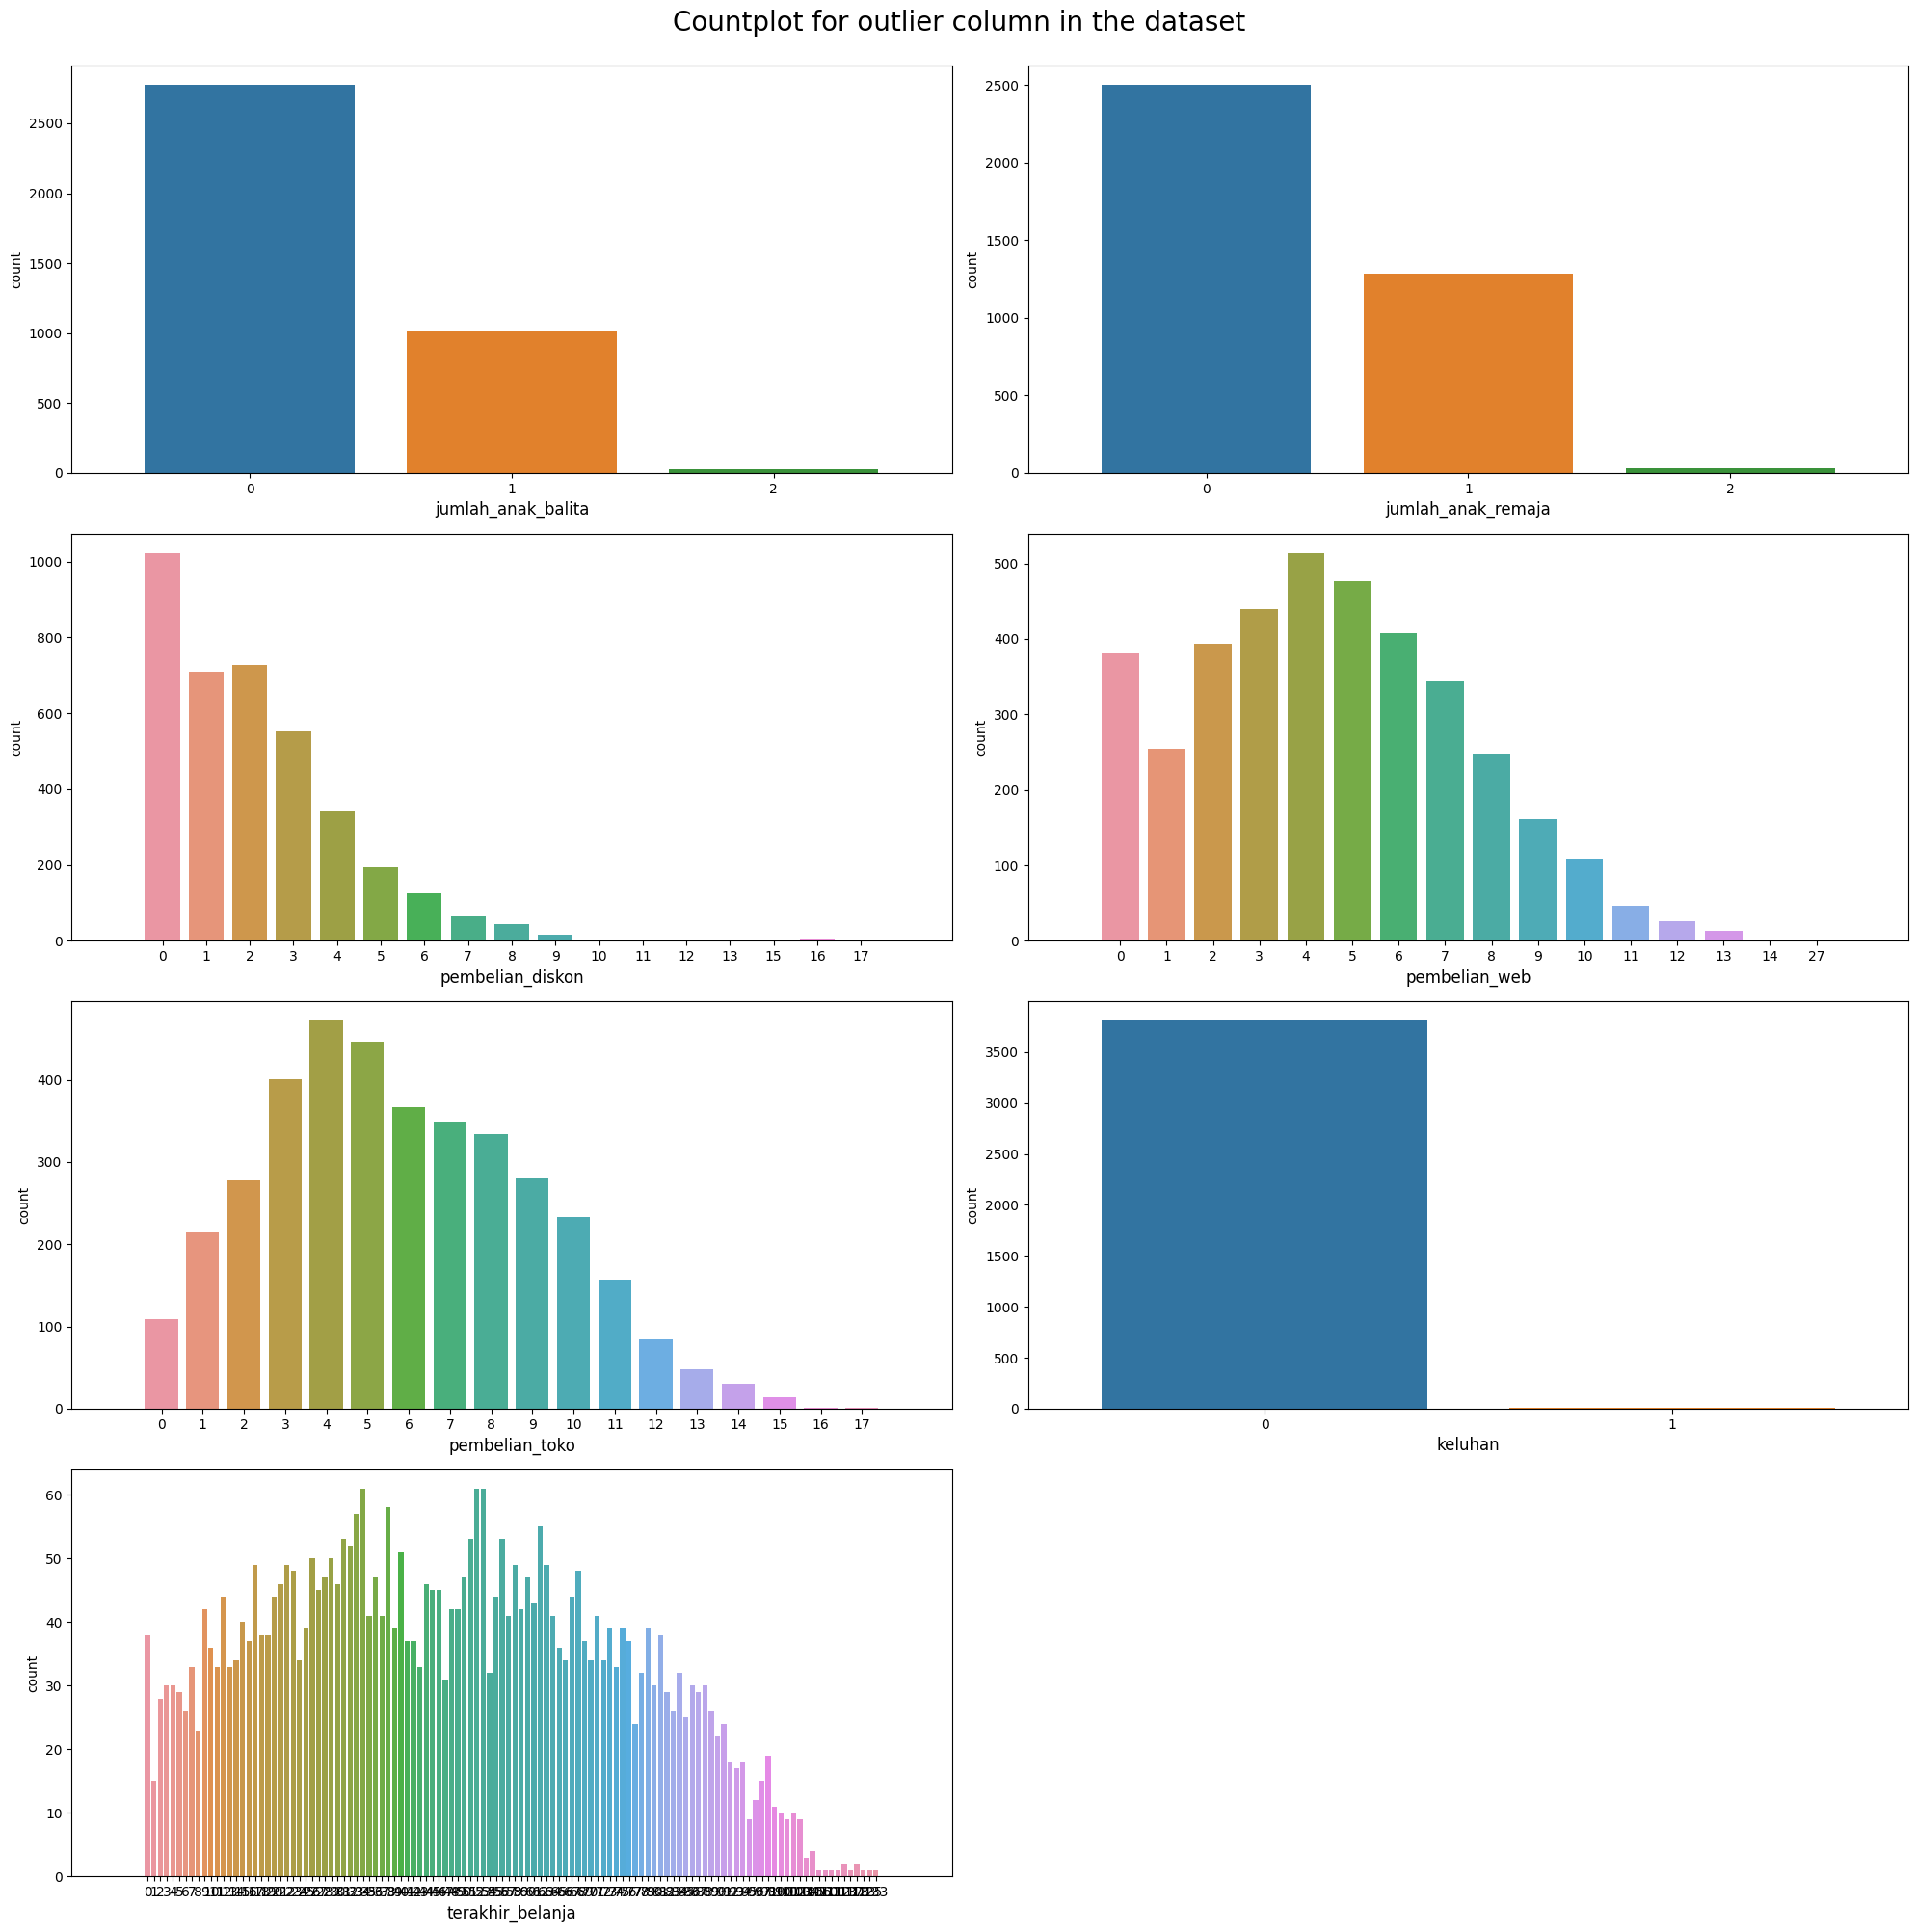

In [47]:
possible_wrong_input_cols = ['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']

for col in possible_wrong_input_cols:
    df_test_mk[col] = df_test_mk[col].apply(lambda x: round_value(x))
    
show_countplot(df_test_mk)

In [48]:
df_test_mk[cat_cols] = apply_custom_ordinal_encoding_mappings(df_test_mk[cat_cols])
for i in cat_cols:
    print(f'{df_test_mk[i].value_counts()}')
    print('\n')

3    2141
4     803
2     408
5     404
1      62
Name: pendidikan, dtype: int64


2    1455
3    1126
1     972
4     206
5      59
Name: status_pernikahan, dtype: int64




In [49]:
df_test_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3818 non-null   float64
 1   tahun_kelahiran     3818 non-null   float64
 2   pendidikan          3818 non-null   int64  
 3   status_pernikahan   3818 non-null   int64  
 4   pendapatan          3818 non-null   float64
 5   jumlah_anak_balita  3818 non-null   int64  
 6   jumlah_anak_remaja  3818 non-null   int64  
 7   terakhir_belanja    3818 non-null   int64  
 8   belanja_buah        3818 non-null   float64
 9   belanja_daging      3818 non-null   float64
 10  belanja_ikan        3818 non-null   float64
 11  belanja_kue         3818 non-null   float64
 12  pembelian_diskon    3818 non-null   int64  
 13  pembelian_web       3818 non-null   int64  
 14  pembelian_toko      3818 non-null   int64  
 15  keluhan             3818 non-null   int64  
dtypes: flo

In [50]:
feature_selected = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan','pembelian_diskon', 'belanja_kue', 'pembelian_web', 'pembelian_toko']
feature_df_test = df_test_mk[feature_selected].copy()

# Fit and transform features
scaler_test = RobustScaler()
scaled_features_test = scaler_test.fit_transform(feature_df_test)

# Convert scaled features array to DataFrame
scaled_feature_df_test = pd.DataFrame(scaled_features_test, columns=feature_selected)

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [53]:
X_train = scaled_feature_df.copy()
y_train = target_df.copy()
X_test = scaled_feature_df_test.copy()


RandomForestClassifier = RandomForestClassifier()
ExtraTreesClassifier = ExtraTreesClassifier()



RandomForestClassifier = RandomForestClassifier.fit(X_train, y_train)
ExtraTreesClassifier = ExtraTreesClassifier.fit(X_train, y_train)



y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)


In [ ]:
rf_df = pd.DataFrame(y_pred_RandomForestClassifier)
etc_df = pd.DataFrame(y_pred_ExtraTreesClassifier)

rf_df.to_csv('rf.csv')
etc_df.to_csv('etc.csv')